# 1. Laboratorijske vježbe iz Numeričke matematike (zad7)

Ime i prezime: *Filip Ćelepirović*

Zadan je rubni problem 
$$-a u''(x)+u'(x)=1 \quad 0<x<1\quad a>0$$
$$u(0)=u(1)=0$$

a) Ovaj problem ima analitičko rješenje koje je jednako
$$u(x)=x-\frac{e^{-\frac{1-x}{a}}-e^{-\frac{1}{a}}}{1-e^{-\frac{1}{a}}}$$
Koriteći biblioteku **matplotlib** nacrtajte ovo rješenje za dva volji odabrana $a.$ 

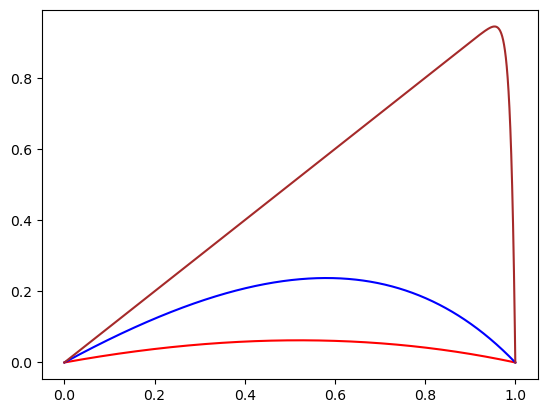

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def analiticko(x, a):
    return x - ((np.exp(-(1-x)/a) - np.exp(-1/a)) / (1 - np.exp(-1/a)))


z1 = np.linspace(0, 1, 1000)

plt.plot(z1, analiticko(z1, 2), color = "red")
plt.plot(z1, analiticko(z1, 0.5), color = "blue")
plt.plot(z1, analiticko(z1, 0.01), color = "brown")


b) Koristeći konačne diferencije diskretizirajte rubni problem kao što smo to radili na predavanjima (u 4. predavanju -trodijagonalni sustavi te u prošlogodišnjem 7. predavanju, drugi dio predavanja). Pri tome prvu derivaciju aproksimirate diferencijom unatrag odnosno koristeći formulu 
$$u'(x_i)\approx \frac{u_i-u_{i-1}}{h}$$ 
Ovdje u Markdown ćeliju zapišite koji sustav dobivate za ako uzmete uniformnu mrežu na [0,1], odnosno točke $$\{x_0=0,x_1,x_2,\ldots , x_n, x_{n+1}\},$$ gdje je $$x_i=x_0+ih, \ i=1,2,3,\ldots, n.$$
Sustav zapišite za $n=5$. (Pisanje matrica provjerite u nekom od *.ipynb s predavanja )

In [2]:
import sympy as sp

n = 5
a = sp.Symbol('a')
h = sp.Rational(1, n)  

A = sp.Matrix.zeros(n-1, n-1)
b = sp.Matrix([1] * (n - 1))

# Popunjavamo tridiagonalnu matricu
for i in range(n - 1):
    A[i, i] = 2 * a / h**2 + 1 / h  # dijagonala
    if i > 0:
        A[i, i - 1] = -a / h**2  # ispod dijagonale
    if i < n - 2:
        A[i, i + 1] = -a / h**2  # iznad dijagonale


print("\nMatrica A:\n")
sp.pprint(A)
print("\nVektor b:\n")
sp.pprint(b)



Matrica A:

⎡50⋅a + 5   -25⋅a       0         0    ⎤
⎢                                      ⎥
⎢ -25⋅a    50⋅a + 5   -25⋅a       0    ⎥
⎢                                      ⎥
⎢   0       -25⋅a    50⋅a + 5   -25⋅a  ⎥
⎢                                      ⎥
⎣   0         0       -25⋅a    50⋅a + 5⎦

Vektor b:

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦


c) Neka je sada $a=2$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju. 

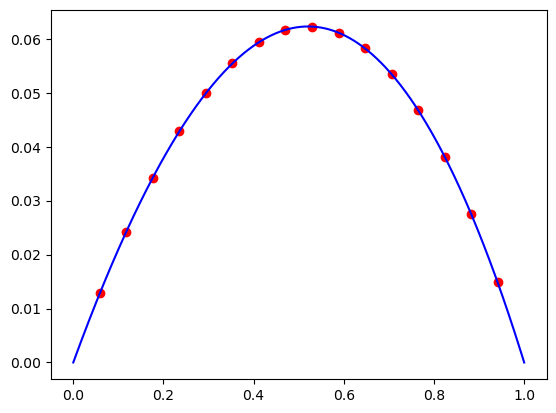

In [8]:
def LUdecomptridiagonal(a, b, c):
    n = len(b)
    for k in range(1, n):
        mu = a[k - 1] / b[k - 1]
        b[k] = b[k] - mu * c[k - 1]
        a[k - 1] = mu
    return a, b, c



def LUsolvetridiagonal(a, b, c, f):
    n = len(b)
    for k in range(1, n):
        f[k] = f[k] - a[k - 1] * f[k - 1]
    f[n - 1] = f[n - 1] / b[n - 1]
    
    for k in range(n - 2, -1, -1):
        f[k] = (f[k] - c[k] * f[k + 1]) / b[k]
    
    return f


def RHS_b(x):
    return 1


def set_abcf(x, alpha, beta, coef):
    n = len(x) - 2
    h = 1.0 / (n + 1)
    f = np.ones((n)) * 2 * h * h
    b = np.ones((n)) * 4 * coef
    a = np.ones((n - 1)) * (-2 * coef - h)
    c = np.ones((n - 1)) * (-2 * coef + h)
    
    for i in range(1, n + 1):
        f[i - 1] = f[i - 1] * RHS_b(x[i])
    f[0] = f[0] + alpha
    f[n - 1] = f[n - 1] + beta
    
    return a, b, c, f


def Thomas(n1, coef):
    n11 = n1 + 2
    x1 = np.linspace(0, 1, n11)
    a, b, c, f = set_abcf(x1, 0, 0, coef)
    a, b, c = LUdecomptridiagonal(a, b, c)
    u = LUsolvetridiagonal(a, b, c, f)
    n = len(x1)
    z1 = np.linspace(0, 1, 1000)
    plt.plot(x1[1:n-1], u, "or")
    plt.plot(z1, analiticko(z1, coef), color = "blue")
    
    
Thomas(16, 2)

d) Neka je sada $a=0.01$ i $n=16$. Riješite dobiveni sustav Thomasovim algoritmom te skicirajte dobivenu aproksimaciju 

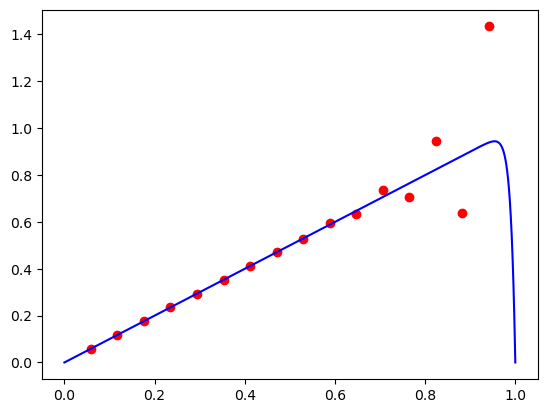

In [9]:
Thomas(16, 0.01)

e)  Sve isto kao po c) i d) za $n=100$

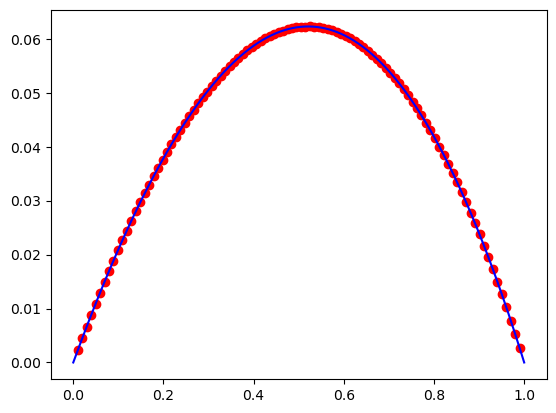

In [10]:
Thomas(100, 2)

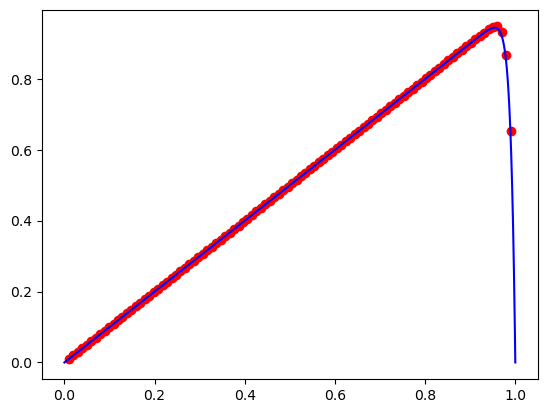

In [12]:
Thomas(100, 0.01)